# Fractal Interpolation

In this notebook, we will consider fractal interpolation. `FractalTools.jl` provides interpolation methods for both one dimenisonal interpolation (also called as curve interpolation or 1D interpolation) and two dimensional interpolation (also called as surface interpolation or 2D interpolation). We will also compare the performances of fractal interpolation methods to those of spline interpolation methods. We start with one dimensional interpolation methods.    

## 1D Interpolation 

In one dimensioal interpolation, the data to be interpolated is given in the form $P = \{(x_i, y_i ~|~ i = 1, 2, \ldots, N\}$ and the aim is to find a continuous function $f$ such that $f(x_i) = y_i$ for all $(x_i, y_i) \in P$. 

### Regular Data 

In this subsection, we will consider the interpolation of regular data, i.e. the data drawn from a smooth function. `FractalTools.jl` also provides tool to generate interpolation test data. Let us load the required packages first.

In [94]:
# Load the packages
using FractalTools
using Makie  
import Interpolations 

and generate somei interpolation data 

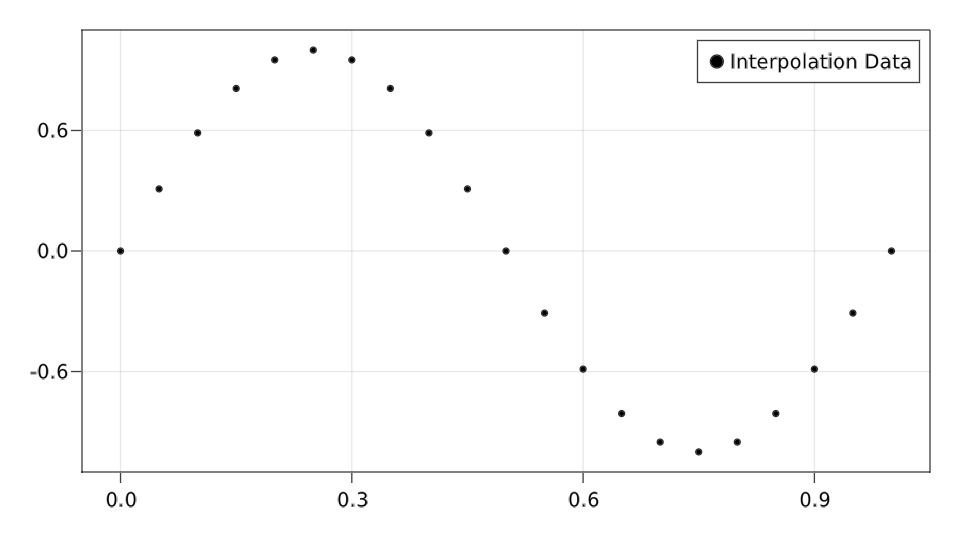

In [95]:
# Generate some interpolation data 
f = FractalTools.sinusoid
domain = [[0.], [1.]]
npts = 21
pts = getdata(f, domain, npts);

# Plot data 
fig = Figure() 
ax1 = fig[1, 1] = Axis(fig)
plt1 = scatter!(ax1, pts, color=:black, markersize=5, label="Interpolation Data")
axislegend()
fig 

Now we are ready to construct and interpolant. To interpolate the data `pts`, we need to provide the interpolation data `pts` and specify and interpolation method. For curve interpolation, `FractalTools.jl` provides two interpolation types: one dimensional fractal interpolation `Interp1D` and one dimensional hidden fractal interpolation `HInterp1D`. Let us choose `Interp1D`. 

In [96]:
freevar = 0.01
interp = interpolate(pts, Interp1D(freevar));

Now we are ready to visuaize the interpolant `interp`. But for that we need some test data for visualization. So we construct the test data and plot `interp` next. 

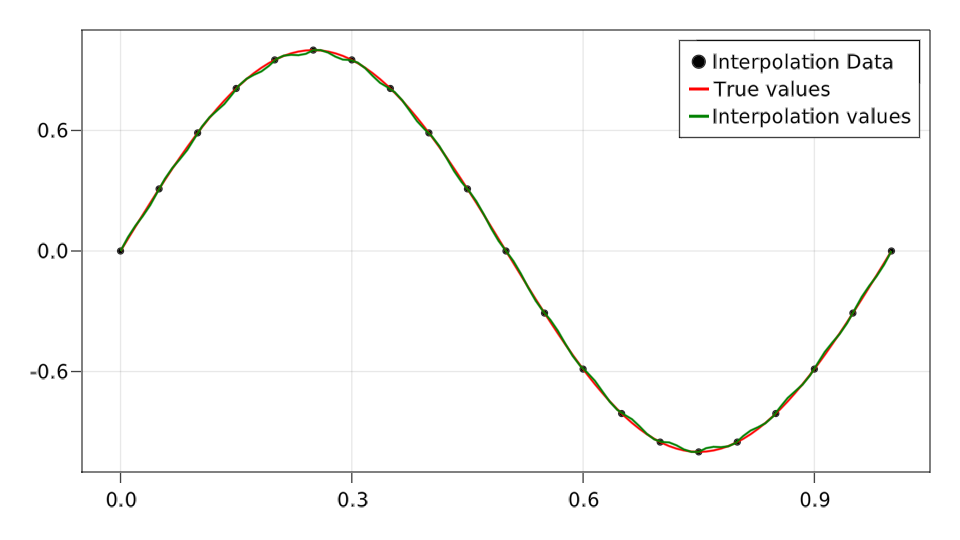

In [97]:
# Construct test data 
ntpts = 5 * npts 
tpts = getdata(domain, ntpts)

# Evaluate interpolation and true valus 
xt = getindex.(tpts, 1)
fvals = f.(xt)
ivals = interp.(xt)

# Plot the true and interpolation methods 
lines!(ax1, xt, fvals, color=:red, linewidth=2, label="True values")
lines!(ax1, xt, ivals, color=:green, linewidth=2, label="Interpolation values")
axislegend()
fig 

Let us calculate the interpolation error at the test points. 

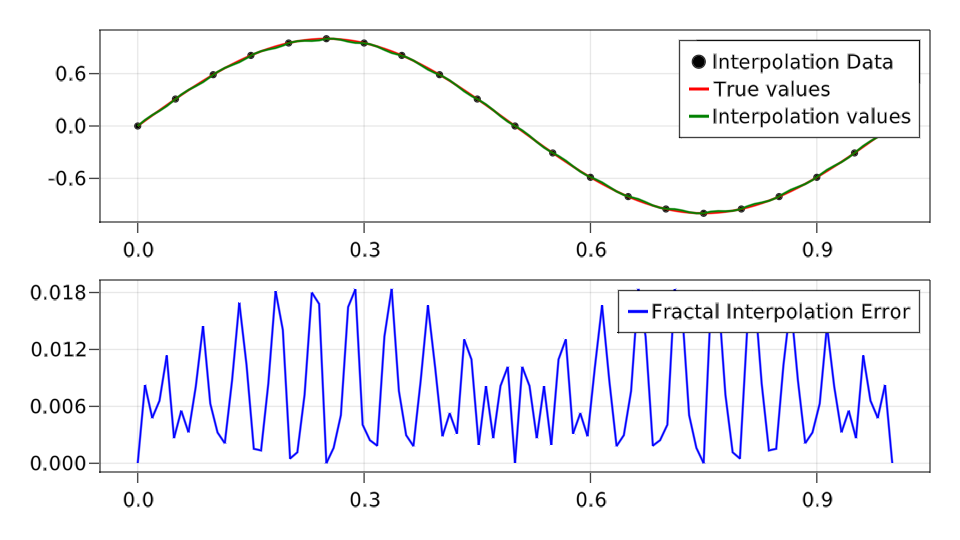

In [98]:
# Calculate absolute error 
err = abs.(fvals - ivals)

# Plot absolute error 
ax2 = fig[2, 1] = Axis(fig) 
lines!(ax2, xt, err, color=:blue, linewidth=2, label="Fractal Interpolation Error")
axislegend() 
fig

Now let us interpolate the data using spine interpolation. 

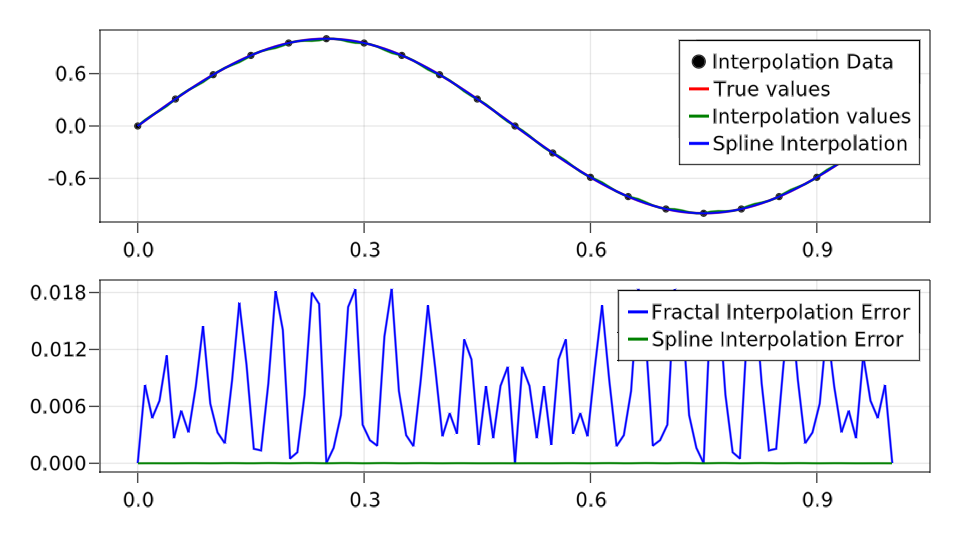

In [99]:
# Construct cubic spline interpolation 
x = getindex.(pts, 1)
xsp = range(x[1], x[end], step=x[2] - x[1])
ysp = f.(xr)
spinterp = Interpolations.CubicSplineInterpolation(xsp, ysp)

# Plot the spline interpolation 
ivalssp = spinterp.(xt)
lines!(ax1, xt, ivalssp, color=:blue, linewidth=2, label="Spline Interpolation")
axislegend(ax1) 

# Plot spline interpolation error 
errsp = abs.(fvals - ivalssp)
lines!(ax2, xt, errsp, color=:green, linewidth=2, label="Spline Interpolation Error")
axislegend(ax2)
fig 

The mean square error (MSE) of the interpolation is good figure of merit to compare the performances of different interpolation methods. MSE values corresponding to fractal and spline interpolation are, 

In [101]:
msefr = sum(err.^2) / length(err)       # Fractal interpolation MSE 
msesp = sum(errsp.^2) / length(errsp)   # Spline interpolation MSE 
@show msefr 
@show msesp;

msefr = 8.873160603953507e-5
msesp = 1.3740490354935973e-10


Both from MSE andi error waveforms, it can be seen that (cuibic) spline interpolation performs better than fractal interpolation. 

At this point, it worths nothing that the performance of fractal interpolation changes directly with the free variable. Since hte data is regular, the ripples in the fractal interpolation can be reduced by making the free variable closer to zero. The number of itearations while construting the interpolant also has a direct impact on the performance of interpolant. 